# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Muhamad Alichwan
- **Email:** alichwan.muhamad@gmail.com
- **ID Dicoding:** alichwan


## Menentukan Pertanyaan Bisnis


- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

- Apakah ada perbedaan pola penyewaan sepeda antara hari kerja dan hari libur?


## Import Semua Packages/Library yang Digunakan


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering Data


In [60]:
day_df = pd.read_csv("day.csv")
day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [61]:
hour_df = pd.read_csv("hour.csv")
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


### Assessing Data


#### Menilai data day


In [62]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [63]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [64]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())
day_df.describe(include="all")

Jumlah Duplikasi:  0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


#### Menilai data hour


In [65]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [66]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe(include="all")

Jumlah duplikasi:  0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


- dari hasil assesing data yang dilakukan tidak ditemukan missing value ataupun data duplikat namun terdapat kesalahan tipe data pada kedua dataset. Kesalahan tersebut terdapat pada kolom dteday dimana kolom tersebut menggunakan tipe data object, yang seharusnya menggunakan tipe data datetime.


### Cleaning Data


#### Mengubah tipe data pada kolom dteday


In [67]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [68]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [69]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)


### Pernyataan dan pertanyaan

Sistem berbagi sepeda adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian sepeda menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya di posisi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran penting mereka dalam masalah lalu lintas, lingkungan dan kesehatan.

Terlepas dari aplikasi dunia nyata yang menarik dari sistem berbagi sepeda, karakteristik data yang dihasilkan oleh
sistem ini membuatnya menarik untuk diteliti. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan secara eksplisit dicatat dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi jaringan sensor virtual yang dapat digunakan untuk merasakan mobilitas di kota. Dengan demikian, diharapkan sebagian besar kejadian penting di kota dapat dideteksi melalui pemantauan data ini.

dari kasus diatas di dapatkan 2 pertanyaan bisnis :

1. Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
2. Apakah ada perbedaan pola penyewaan sepeda antara hari kerja dan hari libur?


### Keterangan :

#### instant : Jumlah Total Jam Atau Hari

#### max : Rental sepeda terbanyak pada musim ini

#### min : Rental sepeda terendah pada musim ini

#### sum : Jumlah Total rental sepeda pada musim ini


### Explore Dataset hour.csv


In [70]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


#### Jumlah penyewaan sepeda Berdasarkan Berbagai Musim


In [ ]:
hour_df.groupby(by="season").agg({"instant": "count", "cnt": ["max", "min", "sum"]})

instant  cnt             
         count  max min      sum
season                          
1         4242  801   1   471348
2         4409  957   1   918589
3         4496  977   1  1061129
4         4232  967   1   841613

#### Jumlah penyewaan sepeda Berdasarkan Hari Kerja


In [ ]:
hour_df.groupby(["season", "workingday"]).agg(
    {"instant": "count", "cnt": ["max", "min", "sum"]}
).query("workingday == 1")

instant  cnt            
                    count  max min     sum
season workingday                         
1      1             2794  801   1  333665
2      1             3066  957   1  630613
3      1             3141  977   1  749073
4      1             2864  967   1  579059

#### Jumlah penyewaan sepeda Berdasarkan Hari Libur


In [ ]:
hour_df.groupby(["season", "workingday"]).agg(
    {"instant": "count", "cnt": ["max", "min", "sum"]}
).query("workingday == 0")

instant  cnt            
                    count  max min     sum
season workingday                         
1      0             1448  690   1  137683
2      0             1343  730   1  287976
3      0             1355  783   1  312056
4      0             1368  776   1  262554

In [74]:
hour_df.groupby(by="season").instant.count().sort_values(ascending=False)

season
3    4496
2    4409
1    4242
4    4232
Name: instant, dtype: int64

### Explore Dataset day.csv


In [75]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Jumlah penyewaan sepeda Berdasarkan berbagai musim


In [ ]:
day_df.groupby(["season"]).agg({"instant": "count", "cnt": ["max", "min", "sum"]})

instant   cnt               
         count   max   min      sum
season                             
1          181  7836   431   471348
2          184  8362   795   918589
3          188  8714  1115  1061129
4          178  8555    22   841613

#### Jumlah penyewaan sepeda Berdasarkan Hari kerja


In [ ]:
day_df.groupby(["season", "workingday"]).agg(
    {"instant": "count", "cnt": ["max", "min", "sum"]}
).query("workingday == 1")

instant   cnt              
                    count   max   min     sum
season workingday                            
1      1              120  6312   431  333665
2      1              128  8362  1471  630613
3      1              131  8173  1842  749073
4      1              121  8156    22  579059

#### Jumlah penyewaan sepeda Berdasarkan Hari libur


In [ ]:
day_df.groupby(["season", "workingday", "mnth"]).agg(
    {"instant": "count", "cnt": ["max", "min", "sum"]}
).query("workingday == 0")

instant   cnt              
                         count   max   min     sum
season workingday mnth                            
1      0          1         22  4521   801   41017
                  2         18  4318  1005   40348
                  3         12  7836   605   43065
                  12         9  2485   754   13253
2      0          3          5  6235  1693   18792
                  4         20  7460   795   89259
                  5         19  8294  3351  105851
                  6         12  8120  4460   74074
3      0          6          5  7458  5202   30543
                  7         21  7410  3285  113518
                  8         16  7865  1115   79415
                  9         15  8714  3351   88580
4      0          9          5  8555  5010   33784
                  10        20  8090   627  102215
                  11        20  6852  1495   80870
                  12        12  5582  2431   45685

In [79]:
day_df.groupby(by="season").instant.count().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

## Visualization & Explanatory Analysis


### Pertanyaan 1:

1. Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?


C:\Users\iwan1\AppData\Local\Temp\ipykernel_6844\136806382.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_workingday_df["season"] = season_workingday_df["season"].map(season_map)
C:\Users\iwan1\AppData\Local\Temp\ipykernel_6844\136806382.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_workingday_df["workingday"] = season_workingday_df["workingday"].map(wokingday_map)


Text(0.5, 0.98, 'Jumlah Penyewaan Sepeda Berdasarkan Musim')

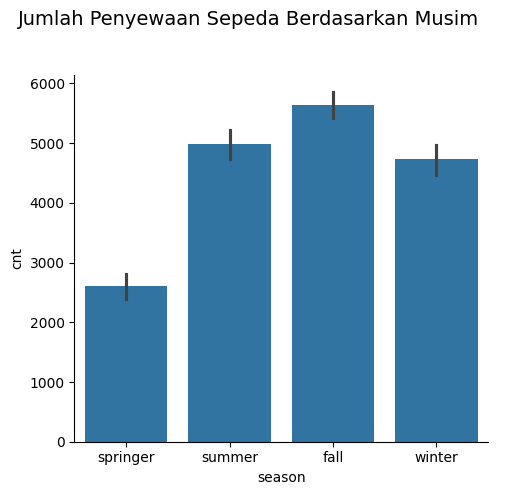

In [ ]:
season_map = {1: "springer", 2: "summer", 3: "fall", 4: "winter"}
wokingday_map = {1: "Working", 0: "Holidays"}


season_workingday_df = day_df[["dteday", "season", "workingday", "cnt"]]
season_workingday_df["season"] = season_workingday_df["season"].map(season_map)
season_workingday_df["workingday"] = season_workingday_df["workingday"].map(
    wokingday_map
)

g = sns.catplot(data=season_workingday_df, x="season", y="cnt", kind="bar")

# Menambahkan judul dengan jarak manual
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Jumlah Penyewaan Sepeda Berdasarkan Musim", fontsize=14)

In [81]:
season_workingday_df

,dteday,season,workingday,cnt
0,2011-01-01,springer,Holidays,985
1,2011-01-02,springer,Holidays,801
2,2011-01-03,springer,Working,1349
3,2011-01-04,springer,Working,1562
4,2011-01-05,springer,Working,1600
...,...,...,...,...
726,2012-12-27,springer,Working,2114
727,2012-12-28,springer,Working,3095
728,2012-12-29,springer,Holidays,1341
729,2012-12-30,springer,Holidays,1796


### Pertanyaan 2:

2. Apakah ada perbedaan pola penyewaan sepeda antara hari kerja dan hari libur?


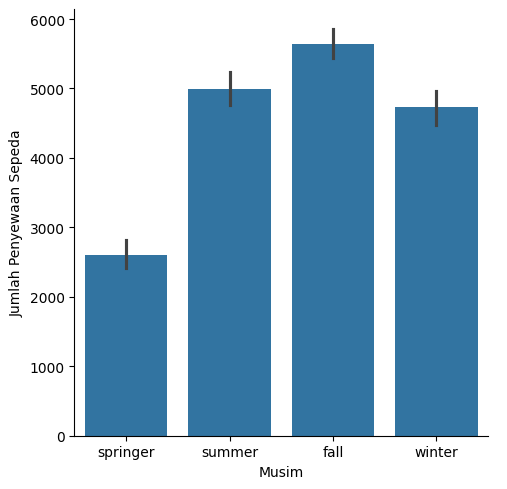

In [82]:
g = sns.catplot(
    data=season_workingday_df,
    x="season",
    y="cnt",
    kind="bar",
)
g.set_xlabels("Musim")
g.set_ylabels("Jumlah Penyewaan Sepeda")

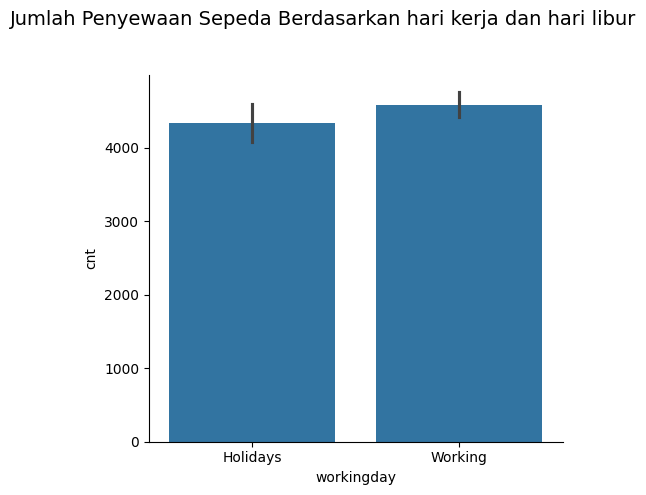

In [ ]:
g = sns.catplot(season_workingday_df, x="workingday", y="cnt", kind="bar")

g.figure.subplots_adjust(top=0.85)
g.figure.suptitle(
    "Jumlah Penyewaan Sepeda Berdasarkan hari kerja dan hari libur", fontsize=14
)
plt.show()

## RFM Analysis


### RFM Analysis digunakan untuk mengidentifikasi segmentasi pelanggan yang paling berpotensi, berdasarkan recency, frequency, dan monetary value.


In [84]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
rfm_df = day_df.groupby(by="registered", as_index=False).agg(
    {"dteday": "max", "instant": "nunique", "cnt": "sum"}
)
rfm_df
rfm_df.columns = ["users", "max_used_timestamp", "frequency", "monetary"]

rfm_df["max_used_timestamp"] = rfm_df["max_used_timestamp"].dt.date
recent_date = day_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_used_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_used_timestamp", axis=1, inplace=True)
rfm_df

,users,frequency,monetary,recency
0,20,1,22,63
1,416,1,431,704
2,432,1,441,5
3,451,1,754,372
4,472,1,506,705
...,...,...,...,...
674,6844,1,7572,89
675,6898,1,7693,68
676,6911,1,7691,82
677,6917,1,8167,101


C:\Users\iwan1\AppData\Local\Temp\ipykernel_6844\1306456639.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\iwan1\AppData\Local\Temp\ipykernel_6844\1306456639.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\iwan1\AppData\Local\Temp\ipykernel_6844\1306456639.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


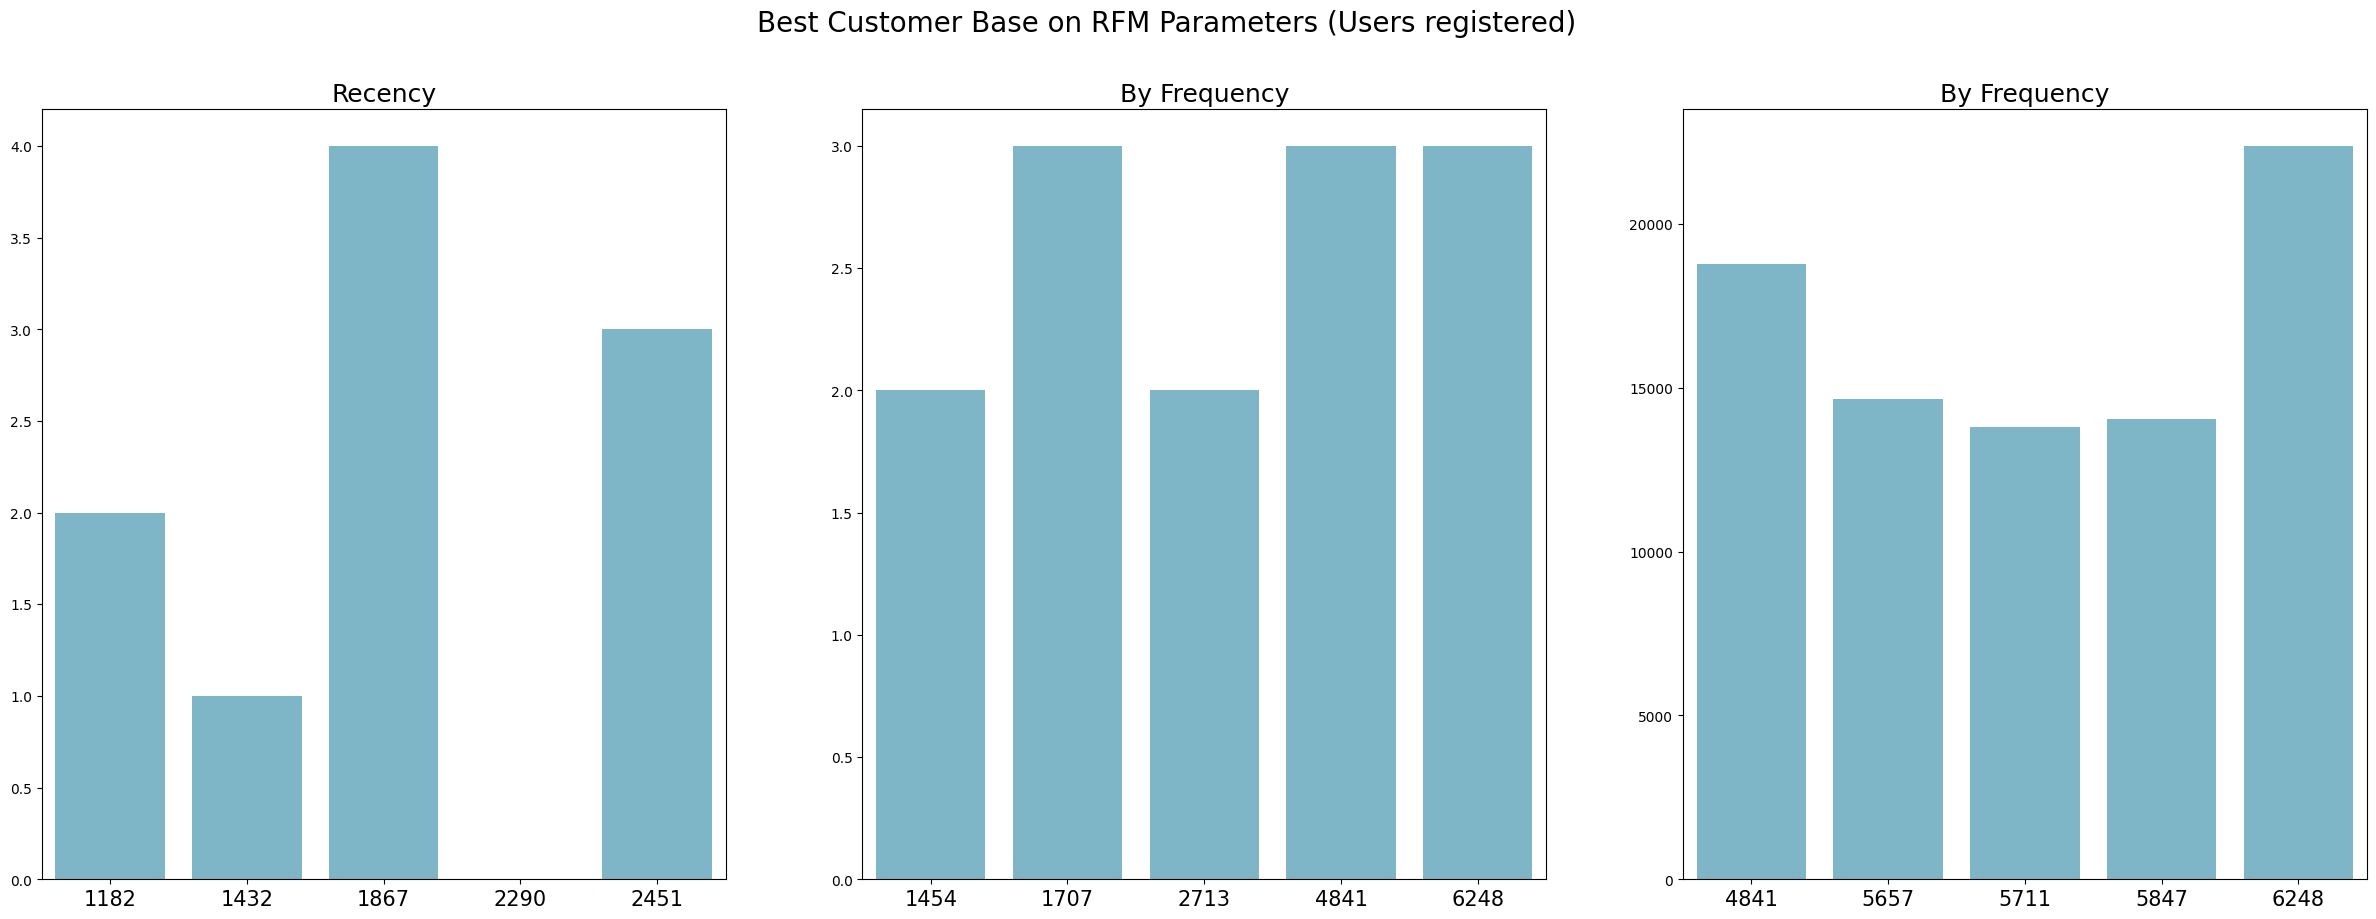

In [86]:
figure, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(
    y="recency",
    x="users",
    data=rfm_df.sort_values(by="recency", ascending=True).head(5),
    palette=colors,
    ax=ax[0],
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Recency", loc="center", fontsize=18)
ax[0].tick_params(axis="x", labelsize=15)

sns.barplot(
    y="frequency",
    x="users",
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
    palette=colors,
    ax=ax[1],
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis="x", labelsize=15)

sns.barplot(
    y="monetary",
    x="users",
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
    palette=colors,
    ax=ax[2],
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Frequency", loc="center", fontsize=18)
ax[2].tick_params(axis="x", labelsize=15)

plt.suptitle("Best Customer Base on RFM Parameters (Users registered)", fontsize=20)
plt.show()

## Conclusion


- 1. Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda ?

     Musim sangat mempengaruhi jumlah penyewaan sepeda pada saat musim gugur jumlah penyewaan sepeda paling tinggi di bandingkan musim lainnya, dan musim musim semi jumlah penyewaan sepeda paling rendah.

- 2. Apakah ada perbedaan pola penyewaan sepeda antara hari kerja dan hari libur?

     terdapat perbedaan pola penyewaan sepeda saat hari kerja dan hari libur, kebanyakan orang lebih menyewa sepeda saat hari kerja daripada hari libur.
